# Random Forest
앙상블ensemble은 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법이다.  
앞서 확인한 것처럼 결정 트리의 주요 단점은 모형이 불안정하고 훈련 데이터에 과대적합되는 경향이 있다는 것이다. 랜덤 포레스트는 이 문제를 회피할 수 있는 방법이다. 랜덤 포레스트는 기본적으로 조금씩 다른 여러 결정 트리의 묶음이다.

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

### Random Forest 모형의 생성

- 랜덤 포레스트 모델을 만들려면 생성할 트리의 개수를 정해야 한다.(RandomForestRegressor나 RandomForestClassifier의 n_estimators 매개변수).  
- 트리를 만들기 위해 먼저 데이터의 부트스트랩 샘플bootstrap sample을 생성한다.
- 그다음 이렇게 만든 데이터셋으로 결정 트리를 만든다.
- 결정 트리 생성시 특성을 랜덤하게 선택한다. 몇 개의 특성을 고를지는 max_features 매개변수로 조정한다.
- max_features를 n_features로 설정하면 트리의 각 분기에서 모든 특성을 고려하므로 특성 선택에 무작위성이 들어가지 않는다.
- max_features=1로 설정하면 트리의 분기는 테스트할 특성을 고를 필요가 없게 되며 그냥 무작위로 선택한 특성의 임계값을 찾기만 하면 된다. 

**Parameter to Tune**
- n_jobs - training에 사용할 core의 갯수 (n_jobs=-1, for all cores)
- n_estimators - 생성할 tree의 갯수 (more is always better)
- max_depth, 가지치기 수준
- max_features, for randomization , 기본값
    - max_features = sqrt(n_features), for classification
    - max_features = log2(n_features), for regression

In [3]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(forest.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(forest.score(X_test, y_test)))

Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.972


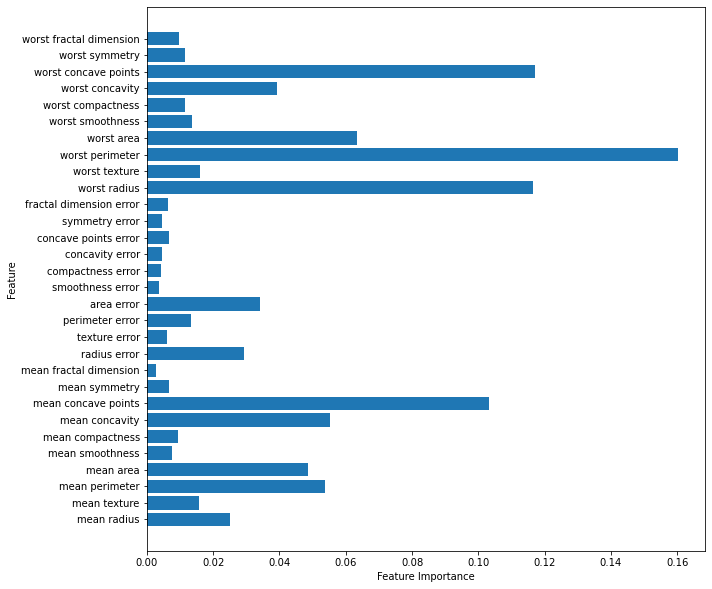

In [6]:
n_features = cancer.data.shape[1]
plt.figure(figsize=(10,10))
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()
